LAB: Visualización de datos usando Matplotlib
==========================================

In [2]:
## Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline

In [3]:
# Carga de archivo
datos = pandas.read_csv('indicadores-mundiales.csv',encoding='latin-1')

In [11]:
# Se genera  tabla para  los puntos 1,2 y 3
region_poblacion = datos.groupby('Region').sum()[['Poblacion 0-14','Poblacion 15-64', 'Poblacion 65+',]]/100

In [12]:
region_poblacion

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,53.186,106.687,10.130
Europa,37.802,138.306,28.905
Las Americas,53.755,109.018,12.231
Oceania,17.848,31.331,2.825
Oriente Medio,17.547,32.511,1.942
africa,111.362,144.527,9.117


In [13]:
datos['fecha'] = pandas.to_datetime(datos['Ano'])

In [20]:
# Se genera la tabla para los puntos 4 y 5
region_gasto = datos.groupby([datos['fecha'].dt.year,'Region']).mean()[['Gasto en salud (per capita)',
                                                               'Poblacion 0-14','Poblacion 15-64', 'Poblacion 65+']]

In [21]:
region_gasto

Gasto en salud (per capita)  Poblacion 0-14  \
fecha Region                                                       
2000  Asia                            182.100000       32.547059   
      Europa                         1143.454545       19.158537   
      Las Americas                    450.028571       31.481081   
      Oceania                         349.454545       34.800000   
      Oriente Medio                   427.846154       34.338462   
      africa                           50.520000       42.490566   
2001  Asia                            169.800000       31.935294   
      Europa                         1177.045455       18.800000   
      Las Americas                    463.228571       31.064865   
      Oceania                         339.181818       34.484615   
      Oriente Medio                   459.230769       33.961538   
      africa                           50.360000       42.258491   
2002  Asia                            169.612903       31.305882   
      Europa                         1359.477273       18.436585   
      Las Americas                    463.400000       30.643243   
      Oceania                         376.454545       34.176923   
      Oriente Medio                   449.076923       33.569231   
      africa                           50.980000       42.018868   
2003  Asia                            196.129032       30.644118   
      Europa                         1704.250000       18.068293   
      Las Americas                    493.542857       30.191892   
      Oceania                         461.727273       33.830769   
      Oriente Medio                   511.000000       33.107692   
      africa                           61.040000       41.788679   
2004  Asia                            215.580645       29.997059   
      Europa                         1975.931818       17.736585   
      Las Americas                    645.600000       30.014815   
      africa                           73.460000       41.560377   

                     Poblacion 15-64  Poblacion 65+  
fecha Region                                         
2000  Asia                 61.779412       5.685294  
      Europa               67.156098      13.692683  
      Las Americas         61.681081       6.837838  
      Oceania              59.900000       5.315385  
      Oriente Medio        61.946154       3.707692  
      africa               54.077358       3.430189  
2001  Asia                 62.244118       5.811765  
      Europa               67.319512      13.882927  
      Las Americas         62.016216       6.924324  
      Oceania              60.115385       5.392308  
      Oriente Medio        62.307692       3.738462  
      africa               54.309434       3.445283  
2002  Asia                 62.744118       5.950000  
      Europa               67.468293      14.097561  
      Las Americas         62.354054       7.008108  
      Oceania              60.361538       5.476923  
      Oriente Medio        62.676923       3.746154  
      africa               54.545283       3.447170  
2003  Asia                 63.255882       6.105882  
      Europa               67.619512      14.314634  
      Las Americas         62.713514       7.086486  
      Oceania              60.630769       5.546154  
      Oriente Medio        63.153846       3.746154  
      africa               54.771698       3.437736  
2004  Asia                 63.761765       6.241176  
      Europa               67.768293      14.512195  
      Las Americas         62.870370       7.125926  
      africa               54.988679       3.441509

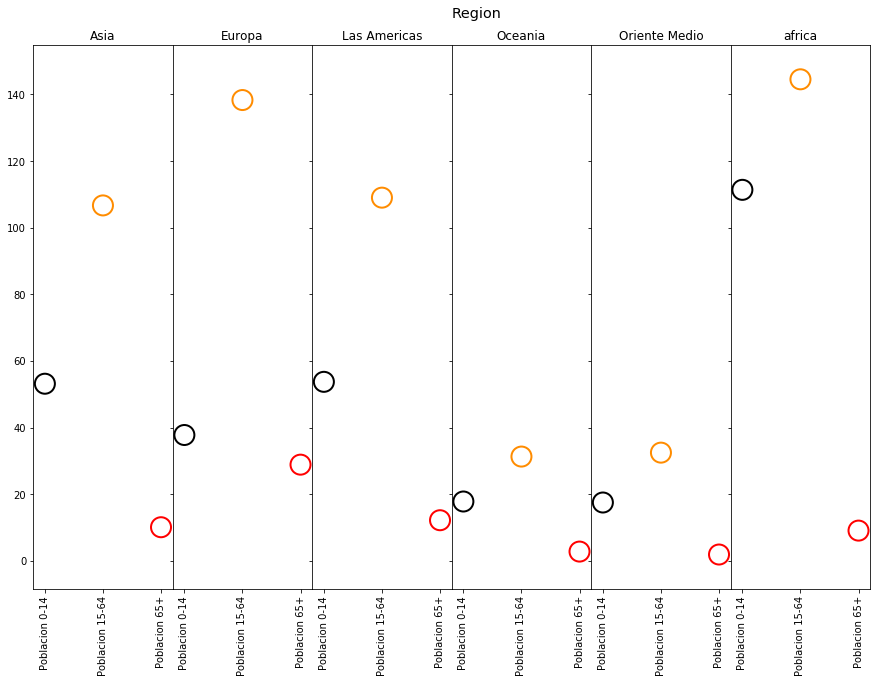

In [15]:
#Punto 1
aux1, aux2 = plt.subplots(1,6,sharey=True,figsize=(15,10))


for i,x in enumerate(aux2):
    
    aux2[i].scatter(list(region_poblacion.keys()),
                   region_poblacion.T[region_poblacion.index[i]],
                   edgecolor=['black','darkorange','red'],
                   marker='o',
                   s=400, 
                   color = ['white']*3,
                   linewidths=2,
                  )
    aux2[i].set_xticklabels(list(region_poblacion.keys()),rotation='vertical')
    aux2[i].set_title(region_poblacion.index[i]);
    

    
plt.subplots_adjust(wspace=0, hspace=0)
plt.text(-5,163,'Region',size='x-large'); 

Text(-7, 160, 'Region')

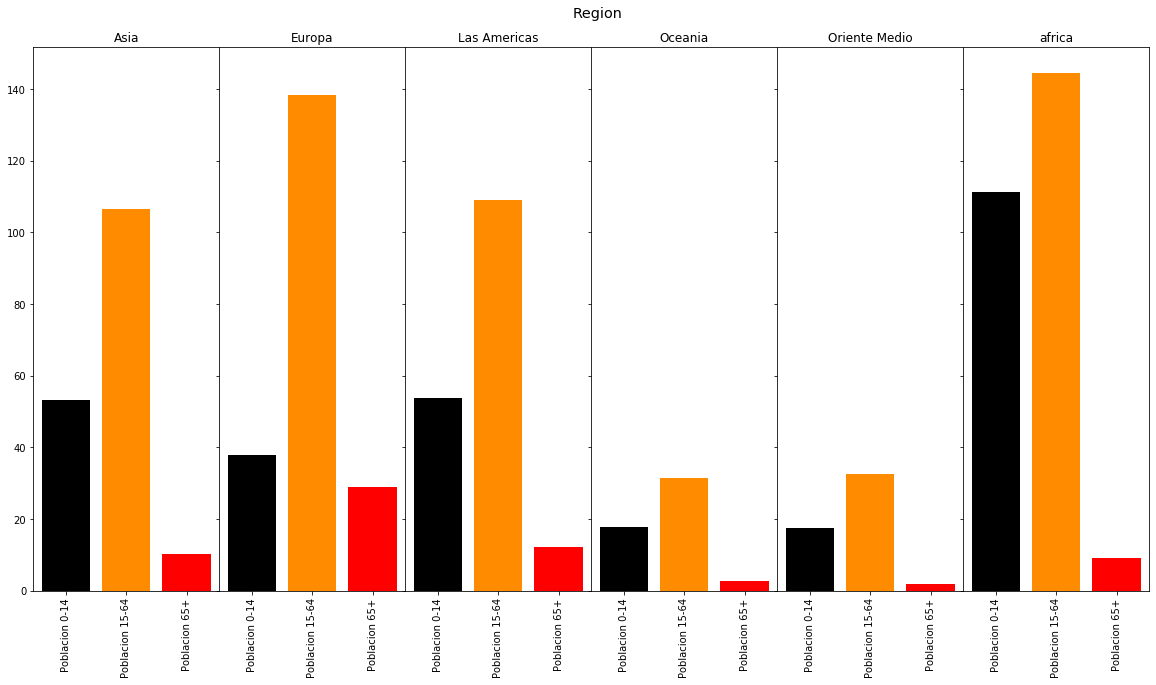

In [16]:
#punto 2
aux1, aux2 = plt.subplots(1,6,sharey=True,figsize=(20,10))


for i,x in enumerate(aux2):
    
    aux2[i].bar(list(region_poblacion.keys()), 
               region_poblacion.T[region_poblacion.index[i]],
               color=['black','darkorange','red'] 
              )
    aux2[i].set_xticklabels(list(region_poblacion.keys()),rotation='vertical')
    aux2[i].set_title(region_poblacion.index[i]); 
    

plt.subplots_adjust(wspace=0, hspace=0)
plt.text(-7,160,'Region',size='x-large')

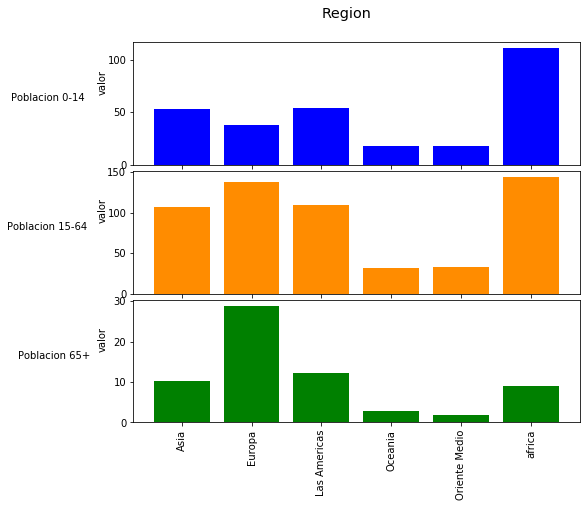

In [18]:
#punto 3 

aux, aux1 = plt.subplots(3,1,sharex=True,figsize=(8,7))


c=['blue','darkorange','green']
pos = [68,90,18]
t=[[0,50,100],[0,50,100,150],[0,10,20,30]] 


for i,x in enumerate(aux1):
    
    aux1[i].bar(region_poblacion.index,
               region_poblacion[list(region_poblacion.keys())[i]], 
               color=c[i]
              )
    aux1[i].set_xticklabels(region_poblacion.index,rotation='vertical')
    aux1[i].set_yticks(t[i])
    aux1[i].text(-1.2,pos[i],'valor',rotation='vertical')
    aux1[i].set_ylabel(region_poblacion.keys()[i],rotation='horizontal',labelpad=60);
    

    
plt.subplots_adjust(wspace=0, hspace=0.05)
plt.text(2,100,'Region',size='x-large');

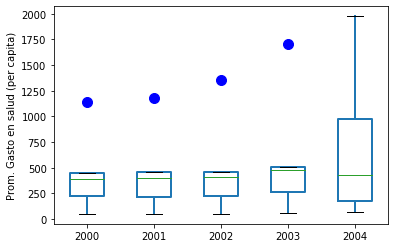

In [22]:
# Punto 4
puntos = dict(marker='o', markerfacecolor='b', markersize=10,
              linestyle='none', markeredgecolor='b',
             ) 
cajas = dict(linewidth=2, color='black')
bigotes = dict(linewidth=2, linestyle='solid', color='black')
media = dict(color='black', linewidth=10) 


region_gasto['Gasto en salud (per capita)'].unstack().T.boxplot(grid=False,
                                                         flierprops=puntos,
                                                         boxprops = cajas,
                                                         whiskerprops = bigotes, 
                                                         meanprops = media, 
                                                        )

plt.ylabel('Prom. Gasto en salud (per capita)');

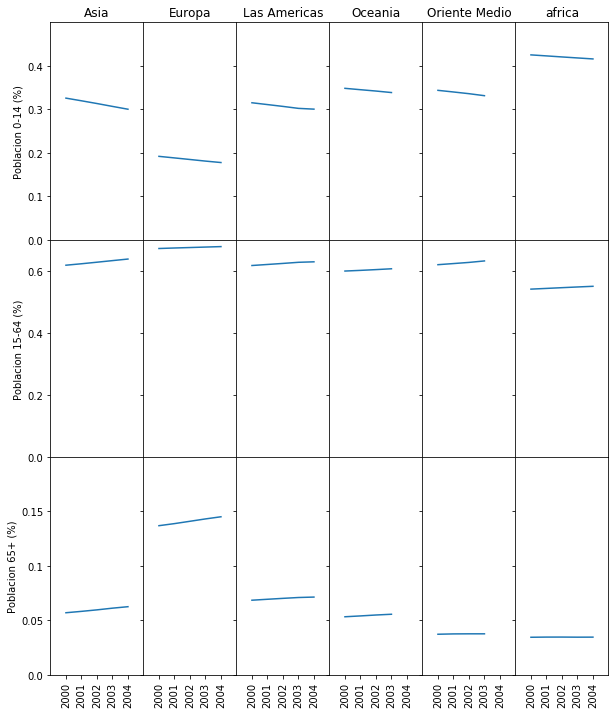

In [23]:
# Parametros iniciales
ticks2= [[0.0, 0.1, 0.2, 0.3,0.4], [0.0, 0.2, 0.4, 0.6], [0.0, 0.05, 0.1, 0.15],]
limites = [[0,0.5],[0,0.7],[0,0.2]]

# Contenedor
fig, axs = plt.subplots(3,6,sharex='col',sharey='row',figsize=(10,12))
plt.subplots_adjust(wspace=0, hspace=0)

# Iterador
for i,pobl in enumerate(region_gasto.keys()[1:]):
    
    for j,reg in enumerate(region_gasto.unstack()['Poblacion 0-14'].keys()):
        
        axs[i,j].plot(region_gasto.unstack()[pobl][reg]/100) 
        axs[2,j].set_xbound(1999,2005)
        axs[i,0].set_ybound(limites[i])
        axs[2,j].set_xticks([2000,2001,2002,2003,2004]) 
        axs[2,j].set_xticklabels(list(range(2000,2005,1)),rotation='vertical')
        axs[0,j].set_title(reg) 
        axs[i,0].set_yticks(ticks2[i]) 
        axs[i,0].set_yticklabels(ticks2[i])
        axs[i,0].set_ylabel(pobl + ' (%)')